In [2]:
from tensorflow.keras.datasets import mnist
import numpy as np

In [3]:
(train_X, train_y), (test_X, test_y) = mnist.load_data()

In [4]:
print('X_train: ' + str(train_X.shape))
print('Y_train: ' + str(train_y.shape))
print('X_test:  '  + str(test_X.shape))
print('Y_test:  '  + str(test_y.shape))

X_train: (60000, 28, 28)
Y_train: (60000,)
X_test:  (10000, 28, 28)
Y_test:  (10000,)


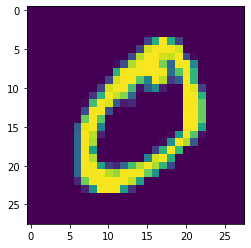

In [6]:
import matplotlib.pyplot as plt 
plt.imshow(train_X[1])
plt.show()

In [7]:
# reshape datasets, create toy model for initial experimentation 
POC = train_X[0:599]
num,d1,d2 = POC.shape
POC = POC.reshape((num, d1 * d2))
POC_lbl = train_y[0:599]

POC_tst = train_X[400:599]
num,d1,d2 = POC_tst.shape
POC_tst = POC_tst.reshape((num, d1 * d2))
POC_lbl_tst = train_y[400:599]

num,d1,d2 = train_X.shape
train_X_transform = train_X.reshape((num, d1*d2))
num,d1,d2 = test_X.shape
test_X_transform = test_X.reshape((num, d1*d2))

In [24]:
# My implementation of KNN for 2D images

# Find euclidean distance between two images 
def calc_distance(img1_flat, img2_flat):
    assert len(img1_flat) == len(img2_flat)
    distance = 0.0
    for i in range(len(img1_flat)):
        distance += (int(img1_flat[i]) - int(img2_flat[i]))**2
    return distance**0.5

def findNeighbors(k, train_set, chk):
    distances = []
    for i in range(len(train_set)):
        d = calc_distance(chk,train_set[i])
        distances.append((i,d))
    # sort based on distance
    distances.sort(key = lambda tup:tup[1])
    #print(distances)
    idx_lst = []
    # return k-nearest neighbors
    for j in range(k):
        idx_lst.append(distances[j][0])
    return idx_lst
    
def predictKNN(k, train_set, train_lbls, test_set):
    predictions = []
    for img in test_set:
        idx_lst = findNeighbors(k, train_set, img)
        #print(idx_lst)
        # populate k frequencies for k nearest neighbors
        freqs = {}
        for val in idx_lst:
            if train_lbls[val] not in freqs:
                freqs[train_lbls[val]] = 1
            else:
                freqs[train_lbls[val]] += 1
        pred_val = max(freqs, key=lambda key:freqs[key])
        #print(pred_val)
        predictions.append(pred_val)
    return predictions
        
def perfAnalysis(predictions, test_lbls):
    assert len(predictions) == len(test_lbls)
    correct = 0
    incorrect = 0
    for i in range(len(predictions)):
        if predictions[i] == test_lbls[i]:
            correct += 1
        else:
            incorrect += 1
    return (correct,incorrect)

# test on toy model
#pred = predictKNN(15, POC, POC_lbl, POC_tst)
#perfAnalysis(pred, POC_lbl_tst)

We will start by using $\sqrt{n}$ as the starting point for $k$, where $n$ is the number of samples in the training dataset. 

In [31]:
k_chk = [1,3,5,10,20,30,40,50,100]
accuracy = []

for i in range(len(k_chk)):
    pred = predictKNN(k_chk[i], train_X_transform[0:1500], train_y[0:1500], test_X_transform[0:150])
    tup = perfAnalysis(pred,test_y[0:150])
    accuracy.append(tup[0] / (tup[0] + tup[1]))
    
print(accuracy)

[0.86, 0.8733333333333333, 0.8933333333333333, 0.9066666666666666, 0.8666666666666667, 0.86, 0.8266666666666667, 0.82, 0.7733333333333333]


(array([140., 172., 144., 142., 160., 137., 141., 177., 134., 153.]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <a list of 10 Patch objects>)

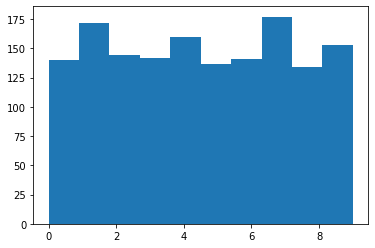

In [32]:
plt.hist(train_y[0:1500])

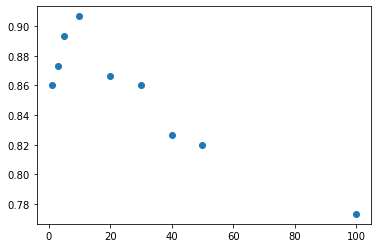

In [36]:
plt.scatter(k_chk,accuracy)
plt.show()

## Compare to out-of-the-box KNN method from sklearn to fit, predict, and evaluate classifier performance:

In [38]:
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.metrics import classification_report

In [58]:
# k_chk = [1,3,5,10,20,30,40,50,100,150,200,300]
k_chk1 = range(1,101,2)
accuracy1 = []

for i in range(len(k_chk1)):
    model = KNN(n_neighbors=k_chk1[i])
    model.fit(train_X_transform[0:1200], train_y[0:1200])
#predictions = model.predict(test_X_transform)
#print(classification_report(test_y, predictions))
    accuracy1.append(model.score(test_X_transform[0:200],test_y[0:200]))


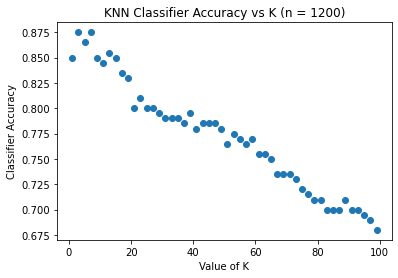

In [59]:
plt.scatter(k_chk1,accuracy1)
plt.title('KNN Classifier Accuracy vs K (n = 1200)')
plt.xlabel('Value of K')
plt.ylabel('Classifier Accuracy')
plt.show()

In [62]:
# k_chk = [1,3,5,10,20,30,40,50,100,150,200,300]
k_chk2 = range(1,101,2)
accuracy2 = []

for i in range(len(k_chk2)):
    model = KNN(n_neighbors=k_chk2[i])
    model.fit(train_X_transform[0:1800], train_y[0:1800])
#predictions = model.predict(test_X_transform)
#print(classification_report(test_y, predictions))
    accuracy2.append(model.score(test_X_transform[0:300],test_y[0:300]))

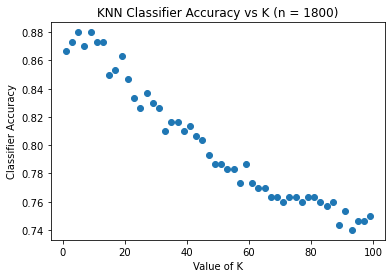

In [63]:
plt.scatter(k_chk2,accuracy2)
plt.title('KNN Classifier Accuracy vs K (n = 1800)')
plt.xlabel('Value of K')
plt.ylabel('Classifier Accuracy')
plt.show()

In [64]:
# k_chk = [1,3,5,10,20,30,40,50,100,150,200,300]
k_chk3 = range(1,101,2)
accuracy3 = []

for i in range(len(k_chk)):
    model = KNN(n_neighbors=k_chk3[i])
    model.fit(train_X_transform[0:3600], train_y[0:3600])
#predictions = model.predict(test_X_transform)
#print(classification_report(test_y, predictions))
    accuracy3.append(model.score(test_X_transform[0:600],test_y[0:600]))


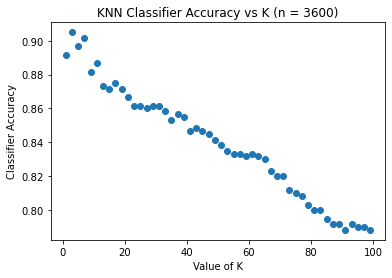

In [65]:
plt.scatter(k_chk3,accuracy3)
plt.title('KNN Classifier Accuracy vs K (n = 3600)')
plt.xlabel('Value of K')
plt.ylabel('Classifier Accuracy')
plt.show()

In [66]:
# k_chk = [1,3,5,10,20,30,40,50,100,150,200,300]
k_chk4 = range(1,101,2)
accuracy4 = []

for i in range(len(k_chk4)):
    model = KNN(n_neighbors=k_chk4[i])
    model.fit(train_X_transform[0:7200], train_y[0:7200])
#predictions = model.predict(test_X_transform)
#print(classification_report(test_y, predictions))
    accuracy4.append(model.score(test_X_transform[0:1200],test_y[0:1200]))


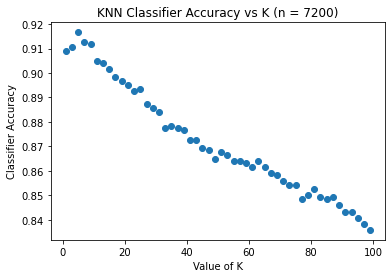

In [67]:
plt.scatter(k_chk4,accuracy4)
plt.title('KNN Classifier Accuracy vs K (n = 7200)')
plt.xlabel('Value of K')
plt.ylabel('Classifier Accuracy')
plt.show()

In [69]:
# k_chk = [1,3,5,10,20,30,40,50,100,150,200,300]
k_chk5 = range(1,11,2)
accuracy5 = []

for i in range(len(k_chk5)):
    model = KNN(n_neighbors=k_chk5[i])
    model.fit(train_X_transform, train_y)
    accuracy5.append(model.score(test_X_transform,test_y))
    print(i, ': ', accuracy5[i])

0 :  0.9691
1 :  0.9705
2 :  0.9688
3 :  0.9694
4 :  0.9659


In [71]:
# Use this value of k!
print(k_chk5[1])

3


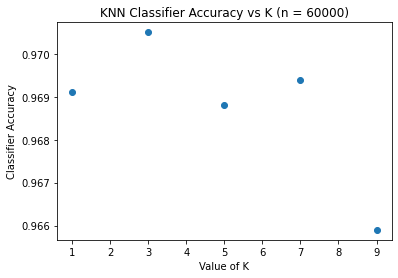

In [70]:
plt.scatter(k_chk5,accuracy5)
plt.title('KNN Classifier Accuracy vs K (n = 60000)')
plt.xlabel('Value of K')
plt.ylabel('Classifier Accuracy')
plt.show()

Default value for weights uses a uniform distance (as used in all examples above). Now that we've tuned k, let's see if weighting the points by the inverse of their distance improves the classifier performance. 

In [73]:
model = KNN(n_neighbors=3, weights='distance')
model.fit(train_X_transform, train_y)
print(model.score(test_X_transform,test_y))

0.9717


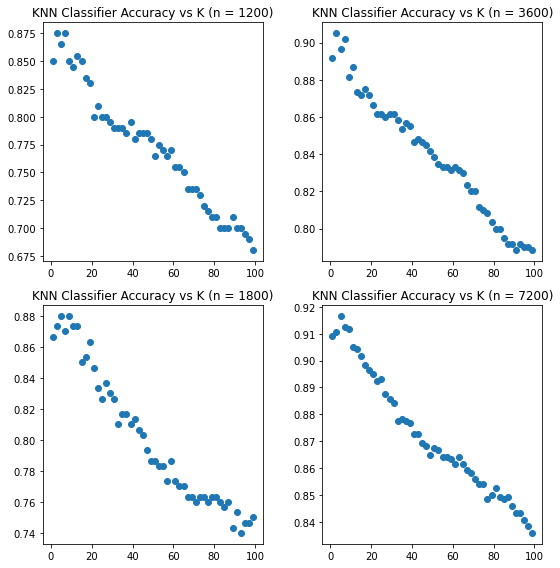

In [79]:
fig, axs = plt.subplots(2, 2,figsize=(8,8))
axs[0, 0].scatter(k_chk1,accuracy1)
axs[0, 0].set_title("KNN Classifier Accuracy vs K (n = 1200)")
axs[1, 0].scatter(k_chk2,accuracy2)
axs[1, 0].set_title("KNN Classifier Accuracy vs K (n = 1800)")
axs[0, 1].scatter(k_chk3,accuracy3)
axs[0, 1].set_title("KNN Classifier Accuracy vs K (n = 3600)")
axs[1, 1].scatter(k_chk4,accuracy4)
axs[1, 1].set_title("KNN Classifier Accuracy vs K (n = 7200)")
fig.tight_layout()

Good Sources:  
https://machinelearningmastery.com/tutorial-to-implement-k-nearest-neighbors-in-python-from-scratch/  
https://www.kaggle.com/marwaf/handwritten-digits-classification-using-knn  
